In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
animes_data = pd.read_csv('./dataset/anime_info.csv')
animes_data.head()

,Unnamed: 0.1,Unnamed: 0,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,0,0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,1,1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,2,2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,3,3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,4,4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0


In [64]:
avg_score = np.mean(animes_data['score'])
avg_score

6.848998200359928

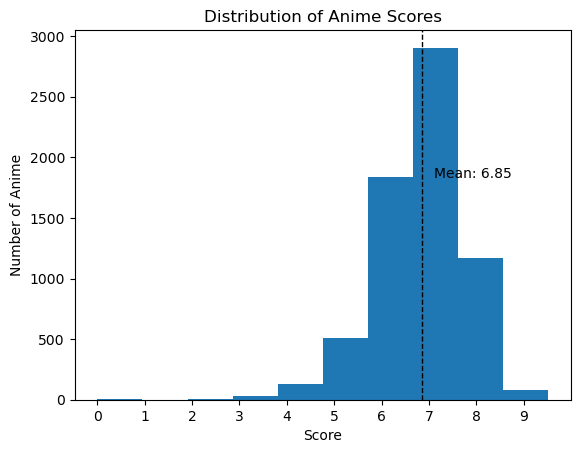

In [96]:
# plot scores
animes_data['score'].hist()
plt.xticks(np.arange(10))
plt.title('Distribution of Anime Scores')
plt.grid()
plt.xlabel('Score')
plt.ylabel('Number of Anime')
plt.axvline(animes_data['score'].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(animes_data['score'].mean()+0.25, max_ylim*.6, 'Mean: {:.2f}'.format(animes_data['score'].mean()))
plt.show()

In [5]:
animes_data.shape[0]

6668

In [20]:
# all genres
genres = []
categories = animes_data['genre']
for value in categories.items():
    if type(value[1]) != str:
        continue
    genre_list = value[1].split(', ')
    for genre in genre_list:
        if genre not in genres:
            genres.append(genre)
genres


['Comedy',
 'Supernatural',
 'Romance',
 'Shounen',
 'Parody',
 'School',
 'Magic',
 'Shoujo',
 'Drama',
 'Fantasy',
 'Kids',
 'Action',
 'Music',
 'Slice of Life',
 'Josei',
 'Harem',
 'Shounen Ai',
 'Adventure',
 'Super Power',
 'Sci-Fi',
 'Ecchi',
 'Seinen',
 'Martial Arts',
 'Game',
 'Sports',
 'Demons',
 'Historical',
 'Horror',
 'Mystery',
 'Psychological',
 'Vampire',
 'Mecha',
 'Military',
 'Space',
 'Samurai',
 'Thriller',
 'Hentai',
 'Yaoi',
 'Shoujo Ai',
 'Police',
 'Cars',
 'Dementia',
 'Yuri']

In [30]:
# filter out nsfw categories -- ecchi, hentai, yaoi, yuri (idk if all of these are necessarily explicit but im gonna play it safe)
def get_explicit(categories):
    if type(categories) == float:
        return True
    lowercase = categories.lower()
    explicit = ['hentai', 'ecchi', 'yaoi', 'yuri']
    if any(m in lowercase for m in explicit):
        return False
    else:
        return True  

In [31]:
is_explicit = animes_data['genre'].apply(get_explicit)
is_explicit

0        True
1        True
2        True
3        True
4        True
        ...  
6663    False
6664     True
6665     True
6666     True
6667     True
Name: genre, Length: 6668, dtype: bool

In [33]:
filtered_anime = animes_data[is_explicit]
filtered_anime.to_csv('./dataset/anime_info.csv')

In [5]:
# user_info = pd.read_csv('./dataset/all_users.csv')
user_info = pd.read_csv('./dataset/user_data.csv')
user_info.shape[0]

108711

In [6]:
user_info.head()

,Unnamed: 0,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,age
0,0,karthiga,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29 00:00:00,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391,34
1,1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01 00:00:00,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903,33
2,2,bskai,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14 00:00:00,NaN,2009-08-31 00:00:00,2014-05-12 16:35:00,8.27,1.0,9701,34
3,3,terune_uzumaki,327311,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24 00:00:00,NaN,2010-05-10 00:00:00,2012-10-18 19:06:00,9.70,6.0,697,26
4,4,Bas_G,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24 00:00:00,NaN,2015-11-26 00:00:00,2018-05-10 20:53:37,7.86,0.0,1847,25


In [40]:
# get user's approximate age
def get_age(birthday):
    birth_year = birthday.split('-')[0]
    return (2024-int(birth_year))

In [41]:
user_ages = user_info['birth_date'].apply(get_age)
user_info = user_info.assign(age = user_ages)
user_info.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,age
0,karthiga,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29 00:00:00,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391,34
1,Damonashu,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01 00:00:00,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903,33
2,bskai,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14 00:00:00,NaN,2009-08-31 00:00:00,2014-05-12 16:35:00,8.27,1.0,9701,34
3,terune_uzumaki,327311,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24 00:00:00,NaN,2010-05-10 00:00:00,2012-10-18 19:06:00,9.70,6.0,697,26
4,Bas_G,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24 00:00:00,NaN,2015-11-26 00:00:00,2018-05-10 20:53:37,7.86,0.0,1847,25


In [49]:
user_info.to_csv('./dataset/user_data.csv')

In [43]:
# get average age of all users
avg_age = np.mean(user_info['age'])
avg_age

31.125819834239405

In [47]:
# get num of female / male users
female = np.count_nonzero(user_info['gender'] == 'Female')
male = np.count_nonzero(user_info['gender'] == 'Male')
total = female+male
print(f'female: {female}, male: {male}, total: {total}')

female: 37330, male: 70880, total: 108210


In [48]:
# get proportions of male vs female
female_prop = female / total
male_prop = male / total
print(f'female: {female_prop}, male: {male_prop}')

female: 0.344977358839294, male: 0.6550226411607061


In [50]:
# get average number of animes completed per user
avg_completed = np.mean(user_info['user_completed'])
avg_completed

196.45817810525153

In [51]:
# get average number of days spent watching per user
avg_days = np.mean(user_info['user_days_spent_watching'])
avg_days

61.913873152189616

In [2]:
anime_lists = pd.read_csv('./dataset/anime_lists.csv')
anime_lists.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN


In [3]:
anime_lists.shape[0]

31284030

In [4]:
# filter for only animes that have been completed
# my_status: 1 = watching, 2 = completed, 3 = on hold, 4 = dropped, 6 = plan to watch
completed_anime = anime_lists[anime_lists['my_status'] == 2]
completed_anime.shape[0]

19946276

In [10]:
# filter out rows with score = NaN
completed_anime = completed_anime.dropna(subset=['my_score']).reset_index(drop=True)
completed_anime.shape[0]

19946276

In [6]:
# filter out users with fewer than 10 
per_user = completed_anime.groupby('username').count()
above_10 = per_user[per_user['anime_id']>10]
users_above_10 = list(above_10.index)
len(users_above_10)

100582

In [11]:
filtered_data = completed_anime[completed_anime['username'].isin(users_above_10)]
filtered_data

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN
5,karthiga,210,161,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:57:06,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31284003,Hentai-Time,13595,2,0000-00-00,2013-06-21,9,2,0.0,0,2012-12-16 08:32:38,NaN
31284004,Hentai-Time,14991,2,2012-12-16,2013-06-21,10,2,0.0,0,2013-06-21 18:07:47,NaN
31284009,Hentai-Time,5959,4,2012-08-21,2012-12-16,6,2,0.0,0,2012-12-16 00:16:01,NaN
31284010,Hentai-Time,13221,2,0000-00-00,2013-06-21,9,2,0.0,0,2012-12-16 09:29:17,NaN


In [18]:
# filter out anime with fewer than 50 reviews
anime_filtered = filtered_data.groupby('anime_id').count()
anime_filtered = anime_filtered[anime_filtered['username'] > 50]
above_50 = list(anime_filtered.index)
len(above_50)

5497

In [19]:
final_filtered = filtered_data[filtered_data['anime_id'].isin(above_50)]
final_filtered

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN
5,karthiga,210,161,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:57:06,NaN
...,...,...,...,...,...,...,...,...,...,...,...
31284003,Hentai-Time,13595,2,0000-00-00,2013-06-21,9,2,0.0,0,2012-12-16 08:32:38,NaN
31284004,Hentai-Time,14991,2,2012-12-16,2013-06-21,10,2,0.0,0,2013-06-21 18:07:47,NaN
31284009,Hentai-Time,5959,4,2012-08-21,2012-12-16,6,2,0.0,0,2012-12-16 00:16:01,NaN
31284010,Hentai-Time,13221,2,0000-00-00,2013-06-21,9,2,0.0,0,2012-12-16 09:29:17,NaN


In [20]:
# sample 200000 reviews for COMPLETED anime
ratings_data = final_filtered.sample(frac=1).reset_index(drop=True)
# ratings_data = completed_anime.sample(200000)
ratings_data.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,tamama_kuroyuki,14817,1,0000-00-00,0000-00-00,7,2,NaN,0,2015-09-08 05:17:10,NaN
1,quazzaar,2449,1,0000-00-00,0000-00-00,8,2,0.0,0,2017-01-26 20:02:53,NaN
2,abhay_shinigami,25013,24,0000-00-00,0000-00-00,9,2,0.0,0,2016-07-03 05:20:28,NaN
3,xever,1566,1,0000-00-00,0000-00-00,7,2,0.0,0,2009-12-29 16:52:36,NaN
4,Equintus,5030,12,0000-00-00,0000-00-00,0,2,0.0,0,2014-09-20 13:30:37,NaN


In [21]:
# extract training data (200000 rows)
training = ratings_data[:200000]
training.shape[0]

200000

In [22]:
training.to_csv('./dataset/ratings_training.csv')

In [23]:
# extract testing data (100000) reviews idk what's reasonable
testing = ratings_data[200000:300000]
testing.shape[0]

100000

In [24]:
testing.to_csv('./dataset/ratings_testing.csv')

In [10]:
anime_lists.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN


In [41]:
user_info.to_csv('./dataset/user_data.csv')

In [46]:
gendered_users = user_info[(user_info['gender'] == 'Female') | (user_info['gender'] == 'Male')]
gendered_users.shape[0]

108210

In [42]:
# compute/plot average scores per gender
female_users = user_info[user_info['gender']=='Female']
female_avg = np.mean(female_users.get('stats_mean_score'))
female_avg

7.848094562014466

In [43]:
male_users = user_info[user_info['gender']=='Male']
male_avg = np.mean(male_users.get('stats_mean_score'))
male_avg

7.696418171557561

In [47]:
print(f'male users: {male_users.shape[0]}, female users: {female_users.shape[0]}, total users: {gendered_users.shape[0]}')

male users: 70880, female users: 37330, total users: 108210


In [61]:
# plot average score vs age
sorted_by_age = user_info.get(['age', 'stats_mean_score'])
sorted_by_age = sorted_by_age.groupby(by='age').mean()
sorted_by_age.head()
ages = list(sorted_by_age.index)
avg_scores = sorted_by_age.get('stats_mean_score')

In [64]:
sorted_by_age

,stats_mean_score
age,
16,7.203333
17,7.695714
18,7.967083
19,7.795800
20,7.792798
21,7.750325
22,7.669671
23,7.681414
24,7.671702


In [63]:
min_age_score = np.min(avg_scores)
max_age_score = np.max(avg_scores)
print(min_age_score, max_age_score)

6.989722222222222 7.967083333333334


[Text(0.5, 0, 'User Age'),
 Text(0, 0.5, 'Average Score'),
 Text(0.5, 1.0, 'User Age Vs. Average Anime Score')]

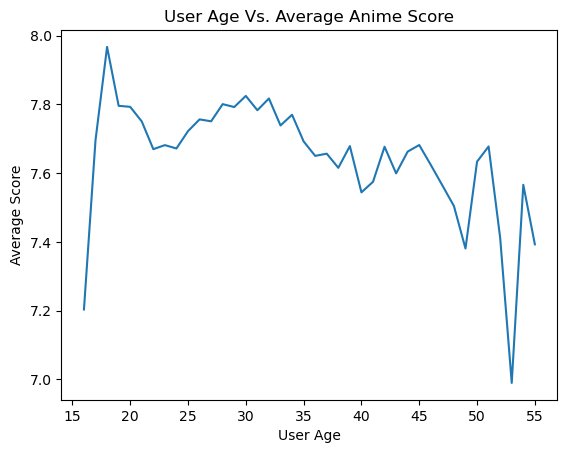

In [65]:
fig,ax = plt.subplots()
ax.plot(ages, avg_scores)
ax.set(xlabel='User Age', ylabel='Average Score', title='User Age Vs. Average Anime Score')

In [59]:
# plot average score versus number of animes watched
# plot average score vs age
num_completed = user_info.get(['user_completed', 'stats_mean_score'])
num_completed = num_completed.groupby(by='user_completed').mean()
num_completed.head()
completed_anime = list(num_completed.index)
avg_scores = num_completed.get('stats_mean_score')

[Text(0.5, 0, 'Number of Completed Anime'),
 Text(0, 0.5, 'Average Score'),
 Text(0.5, 1.0, 'Number of Completed Anime Vs Average Anime Score')]

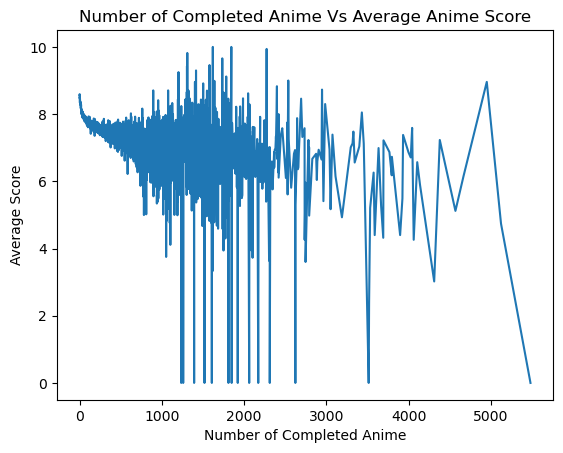

In [60]:
fig,ax = plt.subplots()
ax.plot(completed_anime, avg_scores)
ax.set(xlabel='Number of Completed Anime', ylabel='Average Score', title='Number of Completed Anime Vs Average Anime Score')

In [3]:
animes_data.head()

,Unnamed: 0,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0


In [4]:
# plot avg rating vs anime release year
by_release_year = animes_data.get(['aired_from_year', 'score'])
by_release_year = by_release_year.groupby('aired_from_year', as_index=True).mean()
by_release_year.head()

,score
aired_from_year,
1942.0,6.890
1943.0,6.515
1944.0,5.260
1945.0,5.330
1957.0,5.880


In [9]:
animes_data.sort_values(by='aired_from_year', ascending=False).head()

,Unnamed: 0,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
1095,1234,34607,Lostorage Conflated WIXOSS,NaN,Lostorage conflated WIXOSS,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Card game,0,...,Saturdays at 00:30 (JST),"{'Prequel': [{'mal_id': 33197, 'type': 'anime'...",NaN,NaN,J.C.Staff,"Game, Psychological","['""UNLOCK"" by Yuka Iguchi']","['""I"" by Cyua']",23.000000,2018.0
4886,5601,36470,Tada-kun wa Koi wo Shinai,Tada Never Falls in Love,多田くんは恋をしない,Tada Doesn&#039;t Fall in Love,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,12,...,Thursdays at 21:00 (JST),[],NaN,Sentai Filmworks,Doga Kobo,"Slice of Life, Comedy, Romance","['""Otomodachi Film (オトモダチフィルム)"" by Masayoshi O...","['""Love Song (ラブソング)"" by Teresa Wagner (CV: Ma...",23.000000,2018.0
798,898,37244,Gan Gan Ganko-chan 2nd Season,NaN,がん がん がんこちゃん 第2期,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,8,...,Sundays at 07:55 (JST),"{'Prequel': [{'mal_id': 34488, 'type': 'anime'...",NaN,NaN,10Gauge,"Sci-Fi, Comedy, Kids",[],[],5.000000,2018.0
210,238,36793,3D Kanojo: Real Girl,NaN,３Ｄ彼女 リアルガール,3D Girlfriend,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,...,Wednesdays at 01:59 (JST),"{'Adaptation': [{'mal_id': 50767, 'type': 'man...",NaN,Sentai Filmworks,Hoods Entertainment,"Romance, School, Shoujo","['""Daiji na Koto (だいじなこと)"" by Quruli']","['""HiDE the BLUE"" by BiSH']",22.000000,2018.0
214,242,37104,Slow Start: Web Yokoku Movie,NaN,『スロウスタート』Web予告ムービー,NaN,https://myanimelist.cdn-dena.com/images/anime/...,ONA,4-koma manga,11,...,NaN,"{'Other': [{'mal_id': 35540, 'type': 'anime', ...",NaN,NaN,A-1 Pictures,Slice of Life,[],[],0.633333,2018.0


In [6]:
release_years = list(by_release_year.index)
yearly_scores = by_release_year.get('score')

[Text(0.5, 0, 'Year of Release'),
 Text(0, 0.5, 'Average Score'),
 Text(0.5, 1.0, 'Anime Release Year Vs Average Score')]

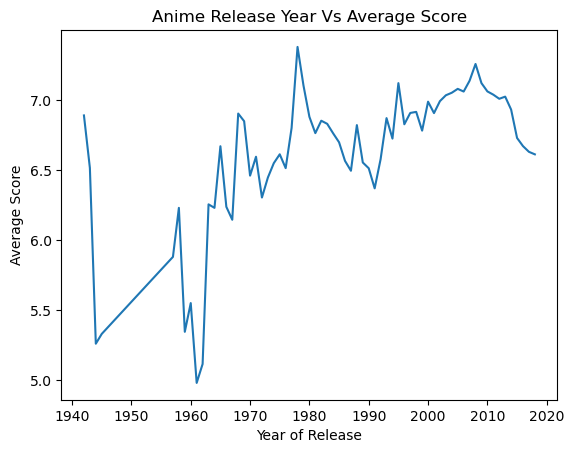

In [7]:
fig,ax = plt.subplots()
ax.plot(release_years, yearly_scores)
ax.set(xlabel='Year of Release', ylabel='Average Score', title='Anime Release Year Vs Average Score')

In [17]:
by_popularity = animes_data.get(['score', 'popularity']) # use scored_by (num of ppl who watched? or popularity)
by_popularity = by_popularity.sort_values(by='popularity', ascending=True).take(np.arange(100))
by_popularity.head()

,score,popularity
3307,8.67,1
3392,8.49,2
2612,7.64,3
1117,9.25,4
3673,8.73,5


In [18]:
popularity = list(by_popularity['popularity'])
popularity_scores = by_popularity.get('score')

[Text(0.5, 0, 'Popularity'),
 Text(0, 0.5, 'Score'),
 Text(0.5, 1.0, 'Anime Popularity Vs Score')]

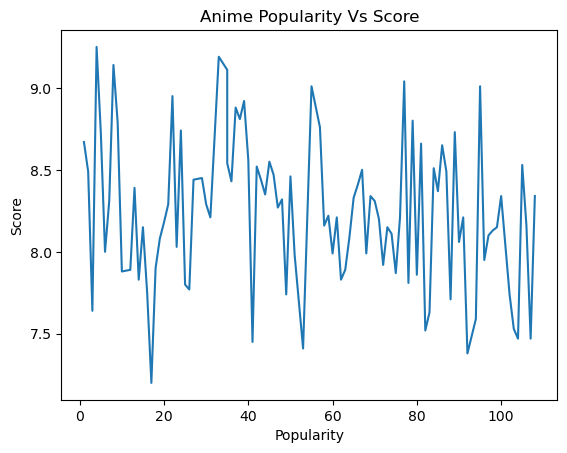

In [19]:
fig,ax = plt.subplots()
ax.plot(popularity, popularity_scores)
ax.set(xlabel='Popularity', ylabel='Score', title='Anime Popularity Vs Score')

In [17]:
animes_data.head()

,Unnamed: 0.1,Unnamed: 0,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,0,0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,1,1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,2,2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,3,3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,4,4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0


In [18]:
animes_data = animes_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'opening_theme', 'ending_theme', 'image_url'])
animes_data

,anime_id,title,title_english,title_japanese,title_synonyms,type,source,episodes,status,airing,...,background,premiered,broadcast,related,producer,licensor,studio,genre,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,TV,Manga,12,Finished Airing,False,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen",24.0,2012.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,TV,Manga,26,Finished Airing,False,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen",24.0,2007.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",TV,Manga,51,Finished Airing,False,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo",24.0,2008.0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,TV,Original,38,Finished Airing,False,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",16.0,2002.0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,TV,Manga,25,Finished Airing,False,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen",24.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,37894,Ling Yu 4th Season,NaN,灵域 第四季,"Spiritual Domain Fourth Season, Spiritual Field 4",ONA,Novel,12,Finished Airing,False,...,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 36791, 'type': 'anime'...",iQIYI,NaN,Haoliners Animation League,Fantasy,13.0,2016.0
5807,37886,Wo Shi Jiang Xiaobai (2018),I&#039;m Joybo OVA,我是江小白 小剧场,Wo Shi Jiang Xiao Bai: Xiao Ju Chang,ONA,Original,1,Finished Airing,False,...,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 36775, 'type': 'anime'...",NaN,NaN,2:10 Animation,"Slice of Life, Drama, Romance",0.0,2018.0
5808,37255,Genki Genki Non-tan: Obake Mura Meiro,NaN,げんきげんきノンタン おばけむらめいろ,NaN,OVA,Original,1,Finished Airing,False,...,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 25619, 'type': 'anime'...",NaN,NaN,Polygon Pictures,"Music, Kids",35.0,2015.0
5809,35229,Mr. Men Little Miss,Mr. Men Little Miss,Mr. Men Little Miss / ミスターメン リトルミス,NaN,ONA,Picture book,0,Currently Airing,True,...,NaN,NaN,NaN,[],NaN,NaN,Sanrio,Kids,2.0,2013.0


In [19]:
# add anime genres as list to anime info
asList = animes_data.get('genre').str.split(', ')
with_genres = animes_data.assign(genre_list=asList)
with_genres.head()

,anime_id,title,title_english,title_japanese,title_synonyms,type,source,episodes,status,airing,...,premiered,broadcast,related,producer,licensor,studio,genre,duration_min,aired_from_year,genre_list
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,TV,Manga,12,Finished Airing,False,...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen",24.0,2012.0,"[Comedy, Supernatural, Romance, Shounen]"
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,TV,Manga,26,Finished Airing,False,...,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen",24.0,2007.0,"[Comedy, Parody, Romance, School, Shounen]"
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",TV,Manga,51,Finished Airing,False,...,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo",24.0,2008.0,"[Comedy, Magic, School, Shoujo]"
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,TV,Original,38,Finished Airing,False,...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",16.0,2002.0,"[Comedy, Drama, Magic, Romance, Fantasy]"
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,TV,Manga,25,Finished Airing,False,...,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen",24.0,2012.0,"[Comedy, Drama, Romance, Shounen]"


In [21]:
with_genres.to_csv('./dataset/anime_info.csv')

In [22]:
# add user genres as list?
user_lists = pd.read_csv('./dataset/anime_lists.csv')
user_lists.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN


In [54]:
completed = user_lists[user_lists['my_status'] == 2]
completed = completed.get(['username', 'anime_id'])
completed.head()

,username,anime_id
1,karthiga,59
2,karthiga,74
3,karthiga,120
4,karthiga,178
5,karthiga,210


In [55]:
animeIDstrings = completed['anime_id'].astype(str)

In [56]:
completed = completed.assign(anime_id=animeIDstrings)
completed.head()

,username,anime_id
1,karthiga,59
2,karthiga,74
3,karthiga,120
4,karthiga,178
5,karthiga,210


In [63]:
user_animes = completed.groupby('username').agg(animes=('anime_id', list))
user_animes.head()

,animes
username,
----phoebelyn,"[853, 957, 24, 43, 135, 153, 245, 486, 513, 52..."
---L-AND-AME-4EV,[1535]
--AnimeBoy--,"[74, 210, 232, 249, 853, 2104, 4224, 7054, 781..."
--Etsuko--,"[3092, 4814, 7054, 9926, 11013, 11123, 14713, ..."
--FallenAngel--,"[59, 210, 249, 853, 857, 957, 1579, 1698, 1914..."


In [64]:
user_animes.shape[0]

108248

In [68]:
with_genres.head()

,anime_id,title,title_english,title_japanese,title_synonyms,type,source,episodes,status,airing,...,premiered,broadcast,related,producer,licensor,studio,genre,duration_min,aired_from_year,genre_list
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,TV,Manga,12,Finished Airing,False,...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen",24.0,2012.0,"[Comedy, Supernatural, Romance, Shounen]"
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,TV,Manga,26,Finished Airing,False,...,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen",24.0,2007.0,"[Comedy, Parody, Romance, School, Shounen]"
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",TV,Manga,51,Finished Airing,False,...,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo",24.0,2008.0,"[Comedy, Magic, School, Shoujo]"
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,TV,Original,38,Finished Airing,False,...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",16.0,2002.0,"[Comedy, Drama, Magic, Romance, Fantasy]"
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,TV,Manga,25,Finished Airing,False,...,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen",24.0,2012.0,"[Comedy, Drama, Romance, Shounen]"


In [71]:
animes_data[animes_data['anime_id']==2104].index[0]

,anime_id,title,title_english,title_japanese,title_synonyms,type,source,episodes,status,airing,...,background,premiered,broadcast,related,producer,licensor,studio,genre,duration_min,aired_from_year
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,TV,Manga,26,Finished Airing,False,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen",24.0,2007.0


In [72]:
user_genres_dict = dict()

In [74]:
user_animes

,animes
username,
----phoebelyn,"[853, 957, 24, 43, 135, 153, 245, 486, 513, 52..."
---L-AND-AME-4EV,[1535]
--AnimeBoy--,"[74, 210, 232, 249, 853, 2104, 4224, 7054, 781..."
--Etsuko--,"[3092, 4814, 7054, 9926, 11013, 11123, 14713, ..."
--FallenAngel--,"[59, 210, 249, 853, 857, 957, 1579, 1698, 1914..."
...,...
zzshinzozz,"[232, 249, 7054, 10800, 11013, 20, 30, 31, 32,..."
zzvl,"[9926, 861, 1686, 2889, 4835, 8063, 8768, 779,..."
zzz275,"[59, 120, 853, 1571, 1698, 2104, 1, 16, 24, 30..."


In [76]:
users = list(user_animes.index)
users[0:5]

['----phoebelyn',
 '---L-AND-AME-4EV',
 '--AnimeBoy--',
 '--Etsuko--',
 '--FallenAngel--']

In [98]:
# map anime IDs to genres
for i in range(user_animes.shape[0]):
    user = users[i]
    anime_list = user_animes.get('animes').iloc[i]
    user_genres = []
    for anime in anime_list:
        row = with_genres[with_genres['anime_id']==int(anime)]
        anime_genres = list(row.get('genre_list'))
        for l in anime_genres:
            if type(l) != list:
                continue
            for g in l: 
                if g not in user_genres:
                    user_genres.append(g)
    user_genres_dict[user] = user_genres

KeyboardInterrupt: 

In [94]:
print(user_genres_dict)

{'----phoebelyn': ['Comedy', 'Harem', 'Romance', 'School', 'Shoujo', 'Adventure', 'Fantasy', 'Historical', 'Drama', 'Shounen', 'Action', 'Sci-Fi', 'Police', 'Psychological', 'Mecha', 'Seinen', 'Game', 'Supernatural', 'Magic', 'Slice of Life', 'Music', 'Super Power', 'Demons', 'Mystery', 'Parody', 'Thriller', 'Space', 'Military', 'Cars', 'Sports', 'Samurai'], '---L-AND-AME-4EV': ['Mystery', 'Police', 'Psychological', 'Supernatural', 'Thriller', 'Shounen']}
